# Clase Tutorial 3

## 1. Introducción 

Existen varios frameworks que permiten desarrollar redes neuronales con facilidad, como son TensorFlow y PyTorch. Sin embargo, en esta clase comenzaremos programando una red neuronal desde cero para obtener un mayor entendimiento y una mejor intuición sobre como funcionan los algoritmos. En particular, vamos a implementar un perceptrón multicapa para una regresión solamente usando NumPy para hacer cálculos matemáticos.

## 2. Descripción del modelo

* El tipo de red neuronal a implementar es un *Perceptrón Multicapa* o *Multilayer Perceptron (MLP)* para resolver una tarea de regresión.
* Un MLP esta compuesto de una *input layer*, una o más *hidden layers* y una capa final llamada *output layer*.
* La información fluye en una sola dirección (desde los *inputs* hacia los *outputs*) por lo que se conoce a este tipo de arquitecturas como **feedforward neural network (FNN)**.
* ¿Cuando se considera "deep" neural network? En los '90s, si tenía más de 2 hidden layers... pero ahora es común ver redes con más de 10 e incluso 100 capas, entonces se perdió noción de este concepto. El término "deep" se refiere a que hay una pila profunda de cálculos matemáticos. En la actualidad, la mayoría habla de "Deep Learning" cuando hay redes neuronales involucradas (aún si son poco profundas).
* Para tareas de regresión, la capa de salida suele tener una función de activación lineal.

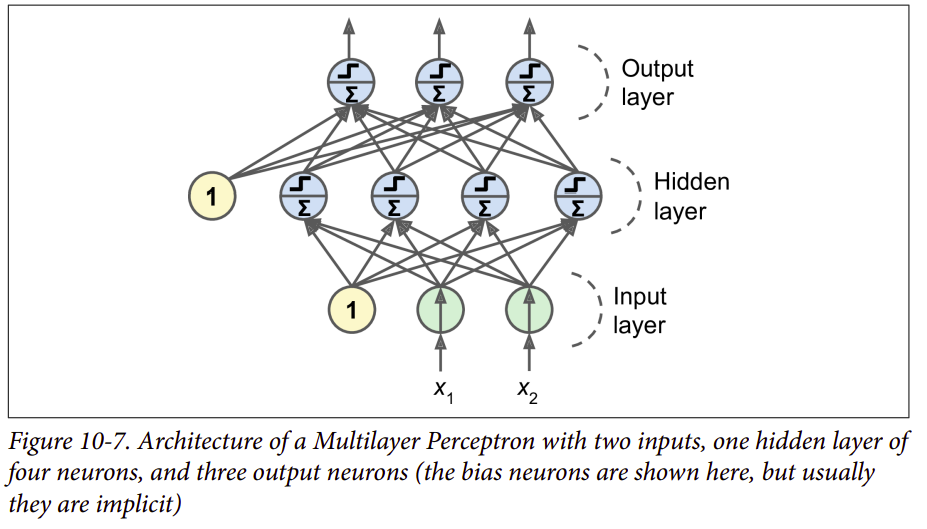

### 🤔 ¿Cómo "aprende" un MLP?

A muy alto nivel, el procedimiento de aprendizaje sigue la siguiente secuencia de pasos:

* Inicializamos los parámetros
* Elegimos algoritmo de optimización
* Repetimos:
    1. Propagación hacia adelante del input
    2. Cálculo de función de pérdida
    3. Cálculo de gradientes de la función de pérdida respecto a los parámetros usando backpropagation
    4. Actualización de cada parámetro usando los gradientes (según el algoritmo de optimización).

#### 🔙Backpropagation
* Durante muchos años, los investigadores lucharon sin éxito por encontrar una manera de entrenar MLP.
* En 1986, David Rumelhart, Geoffrey Hinton y Ronald Williams publicaron un [innovador paper](https://www.semanticscholar.org/paper/Learning-representations-by-back-propagating-errors-Rumelhart-Hinton/052b1d8ce63b07fec3de9dbb583772d860b7c769) que introdujo el algoritmo de entrenamiento de retropropagación/backpropagation, que todavía se utiliza hoy en día.
* Basicamente es gradient descent usando una técnica para computar los gradientes de forma automática: con tan solo 2 pases a través de la red (uno hacia adelante y uno hacia atrás), backpropagation permite computar el gradiente del error de la red con respecto a cada parámetro en particular del modelo. En otras palabras, puede encontrar como cada peso y bias debe ser modificado de manera de reducir el error de salida. Una vez que tenemos los gradientes, simplemente se hace un proceso de optimización y todo el proceso se repite hasta que la red converge a una solución.

### 🤔 ¿Que es Gradient Descent?

* Es un algoritmo de optimización iterativo de primer orden para encontrar el mínimo de una función.
* Su objetivo es minimizar la función de costo de la red neuronal.
* Para lograrlo, tiene dos pasos iterativos:
    1. Calcular el gradiente (derivada de primer orden) de la función en un punto
    2. Moverse en la dirección opuesta del aumento de la pendiente desde es punto actual por una distancia computada
    
    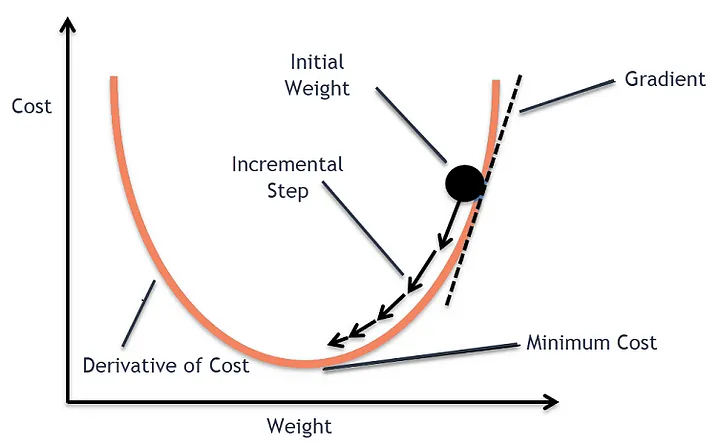

* Entonces, el objetivo es pasar el set de entrenamiento a través de las capas ocultas de la red, y luego ajustar los parámetros de las capas computando los gradientes usando los ejemplos de entrenamiento.

```
for e = 1, ..., epochs:
    for b = 1 ...batchs:
        1. ⏩ Forward Pass 
        2. ⏮️ Backward Pass 
        3. 🔁 Update model weights (to minimize L)
```

### 🤔 Pero ... ¿Qué significa "epoch" y "batch"?

**Epoch**
* Se refiere al número de veces que el algoritmo de entrenamiento va a trabajar sobre el dataset completo.
* 1 epoch: cada muestra de entrenamiento tuvo la chance de updatear los parámetros internos del modelo.
* 1 epoch incluye uno o más batches. 
* Suele ser grande (cientos o miles) para permitir al algoritmo de aprendizaje correr hasta que el error del modelo se haya minimizado lo suficiente. En la literatura se suele elegir 10, 100, 500, 1000 o más.
* Se suelen crear gráficos de línea llamados "learning curves" que muestran el error en función de las epochs, que permiten diagnosticar si el modelo tiene overfitting, underfitting o si tuvo un buen fit para el set de entrenamiento.

**Batch**
* El train set se puede dividir en uno o más "batches". Podemos tener:
    * **Batch Gradient Descent**: Batch Size = Tamaño Training Set 
        * Todas las instancias de entrenamiento se usan para crear un "batch".
        * Se toma el promedio de los gradientes de todos los ejemplos de entrenamiento y luego usamos el gradiente medio para actualizar nuestros parámetros. 
        * En 1 epoch, hay 1 solo paso de GD.
    * **Stochastic Gradient Descent**: Batch Size = 1
        * El "batch" tiene el tamaño de una sola muestra/instancia/ejemplo de entrenamiento.
        * Para datasets grandes. Converge mas rapido porque actualiza mas frecuentemente.
        * Por cada muestra calculamos el gradiente y actualizamos los pesos. 
    * **Mini-Batch Gradient Descent**: 1 < Batch Size < Tamaño Training Set 
        * El "batch" tiene un tamaño mayor que un ejemplo pero mener al tamaño completo del set de entrenamiento.
        * Por cada mini-batch calculamos el gradiente promedio y actualizamos los pesos.

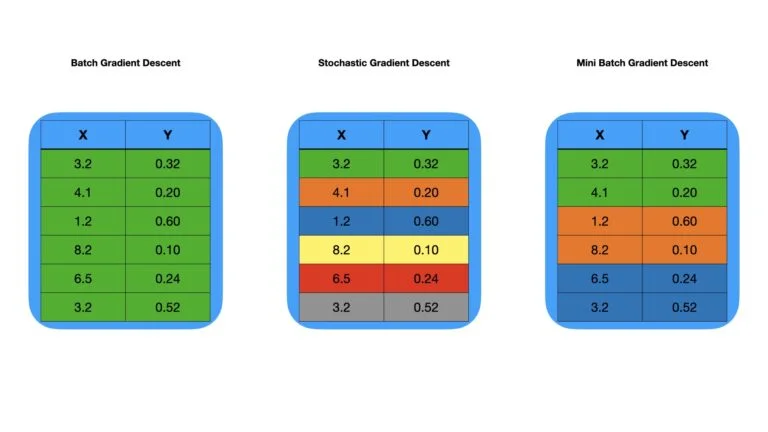

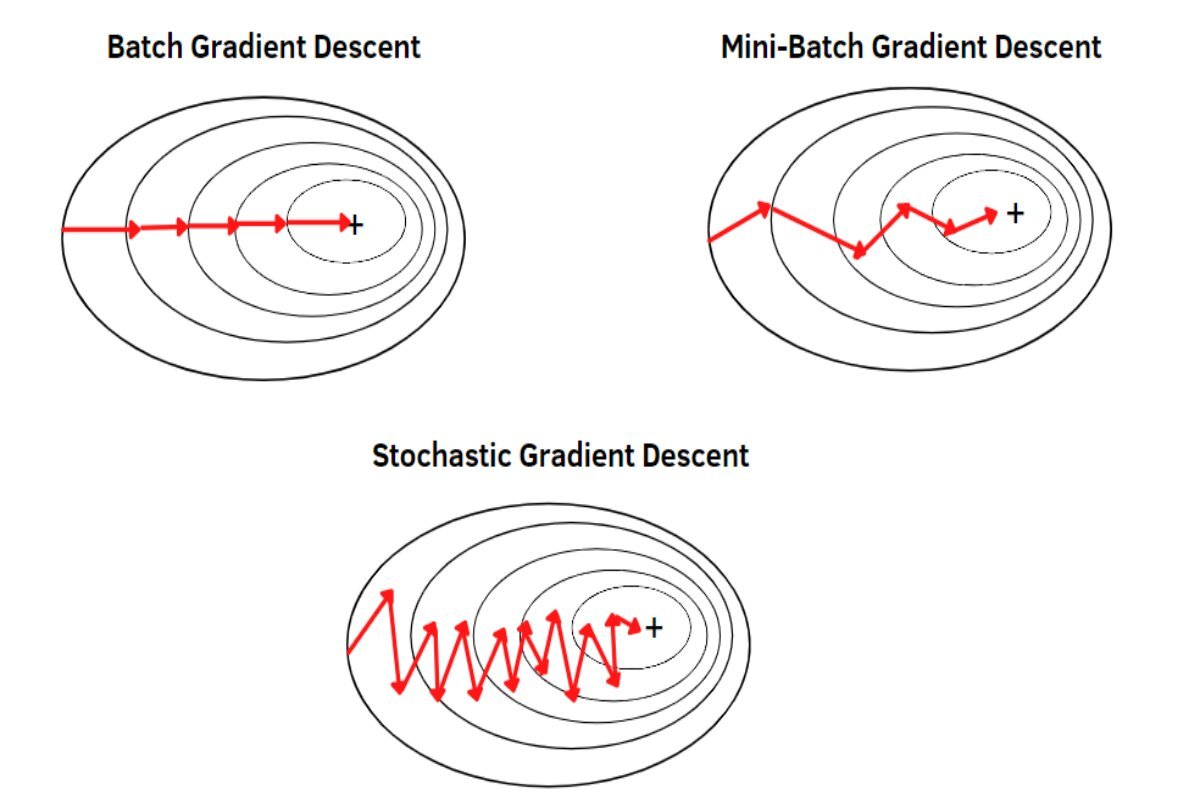

### 🤔 ¿Cómo inicializamos los parámetros?

https://www.deeplearning.ai/ai-notes/initialization/index.html

## 3. Implementación de un MLP para regresión

Encapsularemos la implementación del perceptrón multicapa dentro de una clase llamada `MLP` dentro de `nnet.py`

Para implementar una instancia de la clase debera:

```
from nnet import MLP
model = MLP(layers=[1,10,1],
            activations=["relu","linear"])
```

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nnet import MLP
import utils

## Ejemplo 1

### 📊 Dataset

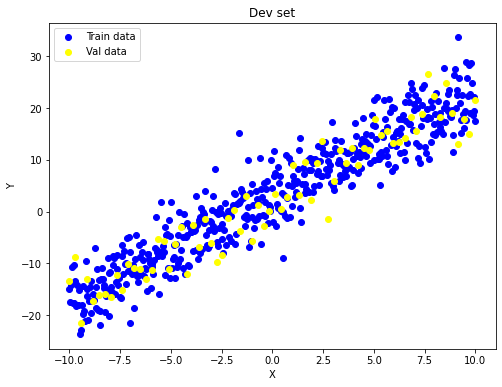

In [5]:
np.random.seed(42)
# Train set
X_train = np.linspace(-10, 10, 500).reshape(-1, 1)
noise = np.random.normal(loc=0, scale=2, size=X_train.shape) 
X_train_with_noise = X_train + noise  
y_train = 2 * X_train_with_noise + 3  

# Val set
X_val = np.linspace(-10, 10, 70).reshape(-1, 1)
X_val_with_noise = X_val + np.random.normal(loc=0, scale=2, size=X_val.shape)   
y_val = 2 * X_val_with_noise + 3

plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Train data')
plt.scatter(X_val, y_val, color='yellow', label='Val data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dev set')
plt.legend()
plt.show()

### 👩🏻‍💻 Creamos MLP 

In [11]:
mlp = MLP(layers=[1, 5, 1], 
          activations=['relu', 'linear'])

### 💪 Entrenamos

In [12]:
t_losses, v_losses = mlp.fit(training_data=list(zip(X_train_with_noise, y_train)), 
                             epochs=500, 
                             mini_batch_size=64, 
                             lr=1e-5,
                             val_data=list(zip(X_val_with_noise, y_val)))

Epoch 0: Train Loss: 324.10960240163683 | Val loss: 766.6000953827707
Epoch 1: Train Loss: 298.71926839474304 | Val loss: 531.3334181450554
Epoch 2: Train Loss: 197.3067601245401 | Val loss: 371.4728997962505
Epoch 3: Train Loss: 139.39450237987072 | Val loss: 262.4750489975279
Epoch 4: Train Loss: 93.68061159616337 | Val loss: 188.47469070629663
Epoch 5: Train Loss: 61.70034128473074 | Val loss: 138.2234729022429
Epoch 6: Train Loss: 58.55172672884141 | Val loss: 104.1102850402292
Epoch 7: Train Loss: 35.846413378176514 | Val loss: 80.95649732911302
Epoch 8: Train Loss: 37.12963084193495 | Val loss: 65.22800418498036
Epoch 9: Train Loss: 27.41113280011809 | Val loss: 54.5347251579256
Epoch 10: Train Loss: 21.82511375424603 | Val loss: 47.25386697503188
Epoch 11: Train Loss: 27.089977834792137 | Val loss: 42.23975217711275
Epoch 12: Train Loss: 23.291791124280966 | Val loss: 38.80800480897152
Epoch 13: Train Loss: 19.67367499976385 | Val loss: 36.43968750413392
Epoch 14: Train Loss: 16

KeyboardInterrupt: 

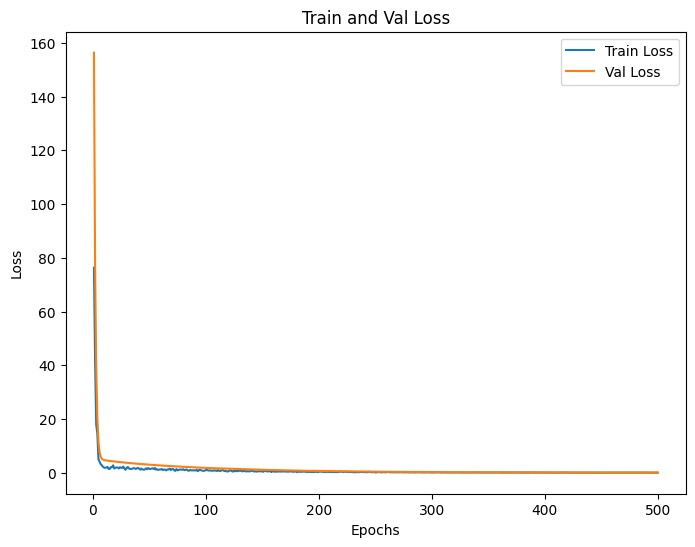

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(t_losses) + 1), t_losses, label='Train Loss')
plt.plot(range(1, len(v_losses) + 1), v_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Val Loss')
plt.legend()
plt.show()

### 🧐 Predicciones con test data

In [ ]:
# Test data
np.random.seed(42)
X_test = np.linspace(-10, 10, 10).reshape(-1, 1)
X_test_with_noise = X_test + np.random.normal(loc=0, scale=2, size=X_test.shape)   
y_test = 2 * X_test_with_noise + 3.1

predictions = mlp.predict(X_test_with_noise)

print("  Predictions  |   Test")
for i in range(len(predictions)):
    print(predictions[i], y_test[i])

  Predictions  |   Test
[-14.89319466] [-14.91314339]
[-13.06343817] [-13.00861276]
[-5.77310633] [-5.42035696]
[2.52971153] [2.52545276]
[-0.6220848] [-0.05883572]
[4.77457699] [4.38567439]
[15.78881827] [16.08351793]
[17.09459658] [17.28085003]
[16.54582885] [16.77765801]
[25.80761141] [25.27024017]


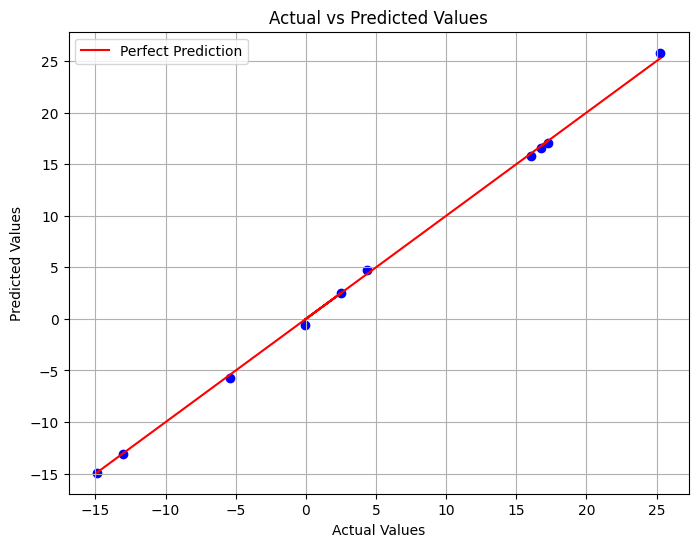

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue')
plt.plot(y_test, y_test, color='red', label='Perfect Prediction')  # Plot perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

## Ejemplo 2

### 📊 Dataset

In [15]:
np.random.seed(42)

x = np.linspace(start = -5, stop =5, num = 5000)
y = x**3 - x**2 + 25 * np.sin(2*x)
noise = np.random.normal(loc=0, scale=1, size=y.shape)
y_with_noise = y + noise

train_ratio = 0.80  # 80% for training
val_ratio = 0.15    # 15% for validation
test_ratio = 0.05   # 5% for testing

train_indices, val_indices, test_indices = utils.train_val_test(x, y, train_ratio, val_ratio, test_ratio)
# Split the dataset into training, validation, and test sets
x_train, y_train = x[train_indices], y_with_noise[train_indices]
x_val, y_val = x[val_indices], y_with_noise[val_indices]
x_test, y_test = x[test_indices], y_with_noise[test_indices]

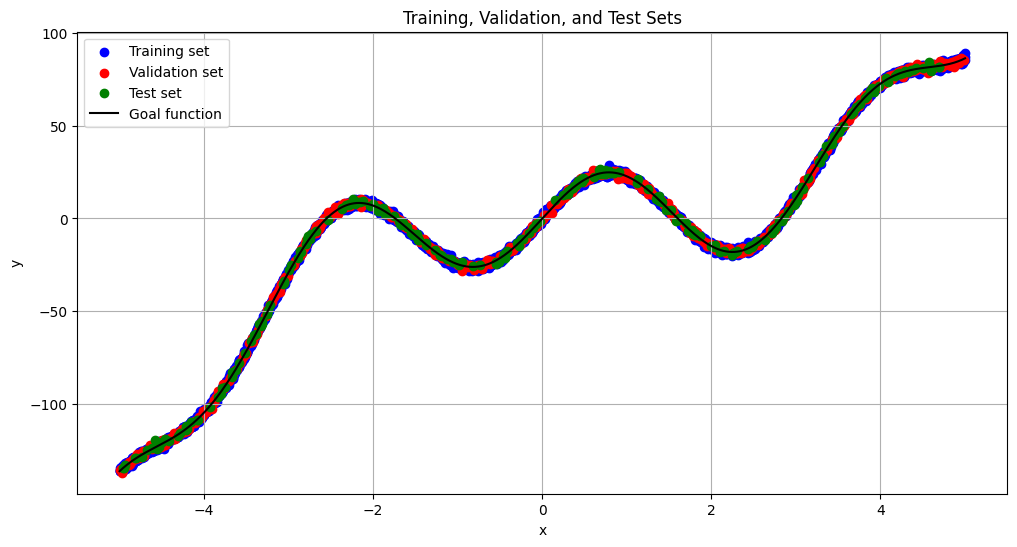

In [16]:
# Plot the training, validation, and test sets
plt.figure(figsize=(12, 6))
plt.scatter(x_train, y_train, color='blue', label='Training set')
plt.scatter(x_val, y_val, color='red', label='Validation set')
plt.scatter(x_test, y_test, color='green', label='Test set')
plt.plot(x, y, color='black', label='Goal function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training, Validation, and Test Sets')
plt.legend()
plt.grid(True)
plt.show()

### 👩🏻‍💻 Creamos MLP 

In [17]:
mlp = MLP(layers=[1,7,8,7,1], 
          activations=['relu','relu','relu','linear'])

### 💪 Entrenamos

In [ ]:
mlp = MLP(layers=[1,7,8,7,1], activations=['relu','relu','relu','linear'])
# Train the MLP
t_losses, v_losses = mlp.fit(training_data=list(zip(x_train, y_train)), 
        epochs=100, 
        mini_batch_size=32, 
        lr=1e-5,
        val_data=list(zip(x_val, y_val)))

Epoch 0: Train Loss: 337.6908744404448 | Val loss: 607.010627286661
Epoch 1: Train Loss: 262.5034419085844 | Val loss: 467.4010663144631
Epoch 2: Train Loss: 153.8271266749816 | Val loss: 274.4586057162039
Epoch 3: Train Loss: 139.26046720708558 | Val loss: 251.6435317781879
Epoch 4: Train Loss: 85.01041981152666 | Val loss: 188.3142823138272
Epoch 5: Train Loss: 104.35066911627236 | Val loss: 275.9872560431392
Epoch 6: Train Loss: 41.67640185067611 | Val loss: 85.5799259994784
Epoch 7: Train Loss: 20.01858825609391 | Val loss: 64.51272604745195
Epoch 8: Train Loss: 26.758316190764848 | Val loss: 46.68159389837827
Epoch 9: Train Loss: 21.089057278393827 | Val loss: 33.58232599881514
Epoch 10: Train Loss: 18.898177071043115 | Val loss: 38.57180076131179
Epoch 11: Train Loss: 11.411986416179143 | Val loss: 24.798304301219
Epoch 12: Train Loss: 5.204328342385053 | Val loss: 18.851710389636015
Epoch 13: Train Loss: 8.311236524329765 | Val loss: 19.829432955219293
Epoch 14: Train Loss: 14.7

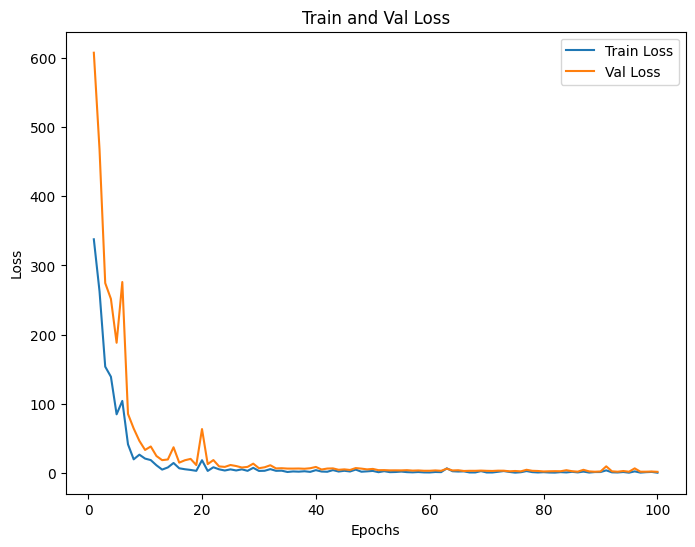

In [ ]:
# Plot the training and test losses
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(t_losses) + 1), t_losses, label='Train Loss')
plt.plot(range(1, len(v_losses) + 1), v_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Val Loss')
plt.legend()
plt.show()

In [ ]:
predictions = mlp.predict(x_test)

print("  Predictions  |   Test")
for i in range(len(predictions)):
    print(predictions[i], y_test[i])

  Predictions  |   Test
[-77.84483588] -78.06220761082962
[-134.12066697] -134.71938509727408
[-16.68177872] -16.8704164315015
[-20.18580688] -23.346082839423104
[-18.42466538] -19.800341598129187
[2.80654697] 3.281808766300399
[-7.55405916] -6.154538892197161
[6.57344039] 9.943541341496534
[7.52301823] 10.263594660027033
[24.00119946] 25.047784970374156
[-14.75398432] -14.670062450558257
[0.93828666] -1.4589357617801082
[7.94938795] 6.67041031173483
[7.68734823] 8.865533754438129
[-13.00518069] -13.71427739816268
[68.71735458] 68.73705621647295
[13.69821521] 9.25291159286849
[-18.50896267] -19.10226301027929
[78.29662516] 80.20031502236023
[3.52833681] 5.895730578199724
[18.08928425] 18.26195316471665
[-1.2418745] -1.1249772442791
[0.57691254] -1.6514483866922531
[-9.92320112] -11.81473734141713
[-15.84783049] -14.362411878991782
[73.77028179] 73.44252258321228
[-133.77040125] -132.8397265481483
[-8.76734034] -8.032199375452775
[-6.135152] -5.779624825547252
[83.09821915] 81.795151864

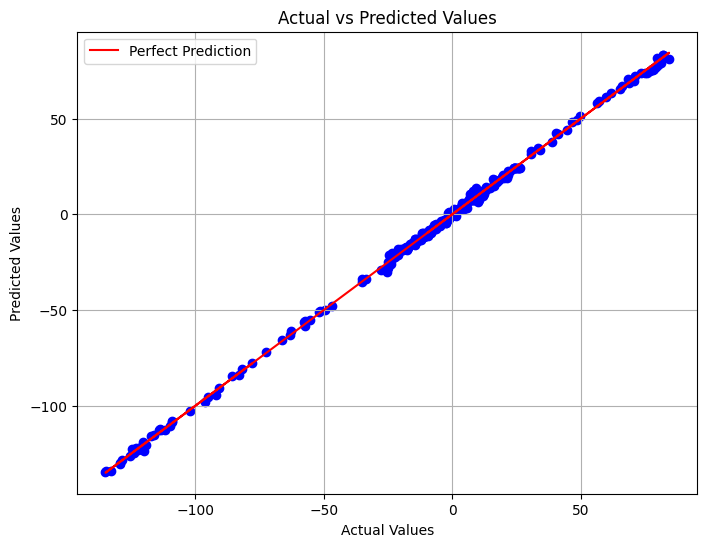

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue')
plt.plot(y_test, y_test, color='red', label='Perfect Prediction') 
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()